<a href="https://colab.research.google.com/github/SainiManisha/convnet-tutorial/blob/master/CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Networks
![cnn](https://miro.medium.com/max/2000/1*vkQ0hXDaQv57sALXAJquxA.jpeg)

## Convolution
![CNN](https://miro.medium.com/max/588/1*BMngs93_rm2_BpJFH2mS0Q.gif) ![convolution](https://media3.giphy.com/media/i4NjAwytgIRDW/200.gif)

## Max Pooling
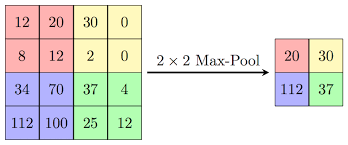



 **Import the Library and Packages**

In [0]:
from matplotlib import pyplot as plt
import numpy as np

**Import Dataset**



In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


**Normalize the Data**

In [0]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

In [4]:
print('train_images shape',train_images.shape)
print('train_labels shape',train_labels.shape)

train_images shape (60000, 28, 28, 1)
train_labels shape (60000,)


In [5]:
print('test_images shape',test_images.shape)
print('test_labels shape',test_labels.shape)

test_images shape (10000, 28, 28, 1)
test_labels shape (10000,)


**Change the class Label using one hot encoding**

In [0]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

**Build the model for feature extraction**

In [0]:
#@title
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), 
                        activation='relu', 
                        name='C1',
                        input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2), 
                              name='M2'))
model.add(layers.Conv2D(64, (3, 3), 
                        name='C3', activation='relu'))
model.add(layers.MaxPooling2D((2, 2), name='M4'))
model.add(layers.Conv2D(64, (3, 3), 
                        activation='relu', name='C5'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
C1 (Conv2D)                  (None, 26, 26, 32)        320       
_________________________________________________________________
M2 (MaxPooling2D)            (None, 13, 13, 32)        0         
_________________________________________________________________
C3 (Conv2D)                  (None, 11, 11, 64)        18496     
_________________________________________________________________
M4 (MaxPooling2D)            (None, 5, 5, 64)          0         
_________________________________________________________________
C5 (Conv2D)                  (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


![MNIST CNN](https://github.com/SainiManisha/convnet-tutorial/blob/master/cs1.jpg?raw=true)

**Adding a classifier on top of the convnet**



In [0]:
model.add(layers.Flatten(name='F6'))
model.add(layers.Dense(64, activation='relu', name='FC7'))
model.add(layers.Dense(10, activation='softmax', name='FC8'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
C1 (Conv2D)                  (None, 26, 26, 32)        320       
_________________________________________________________________
M2 (MaxPooling2D)            (None, 13, 13, 32)        0         
_________________________________________________________________
C3 (Conv2D)                  (None, 11, 11, 64)        18496     
_________________________________________________________________
M4 (MaxPooling2D)            (None, 5, 5, 64)          0         
_________________________________________________________________
C5 (Conv2D)                  (None, 3, 3, 64)          36928     
_________________________________________________________________
F6 (Flatten)                 (None, 576)               0         
_________________________________________________________________
FC7 (Dense)                  (None, 64)                3

**Compile  and train the Model**

In [0]:
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
history = model.fit(
    train_images, train_labels, 
    epochs=10, batch_size=180,
    validation_split=0.3)

Epoch 1/10
234/234 [==============================] - 2s 7ms/step - loss: 2.1277 - accuracy: 0.4184 - val_loss: 1.5530 - val_accuracy: 0.6683
Epoch 2/10
234/234 [==============================] - 1s 5ms/step - loss: 0.7768 - accuracy: 0.7971 - val_loss: 0.4894 - val_accuracy: 0.8438
Epoch 3/10
234/234 [==============================] - 1s 5ms/step - loss: 0.3957 - accuracy: 0.8800 - val_loss: 0.3383 - val_accuracy: 0.8952
Epoch 4/10
234/234 [==============================] - 1s 5ms/step - loss: 0.3023 - accuracy: 0.9074 - val_loss: 0.2904 - val_accuracy: 0.9109
Epoch 5/10
234/234 [==============================] - 1s 5ms/step - loss: 0.2492 - accuracy: 0.9238 - val_loss: 0.2429 - val_accuracy: 0.9258
Epoch 6/10
234/234 [==============================] - 1s 5ms/step - loss: 0.2099 - accuracy: 0.9359 - val_loss: 0.2111 - val_accuracy: 0.9344
Epoch 7/10
234/234 [==============================] - 1s 5ms/step - loss: 0.1797 - accuracy: 0.9460 - val_loss: 0.1828 - val_accuracy: 0.9438
Epoch 

**Evaluate the Model**

In [13]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)
test_acc

0.9472000002861023

**Plot the Graph of Accuracy and Loss in case of Model**

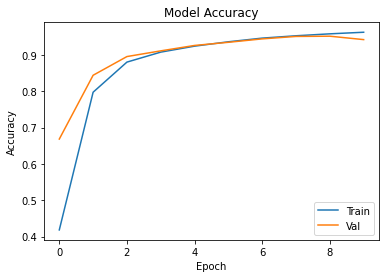

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend(['Train', 'Val'],loc='lower right')
plt.show()

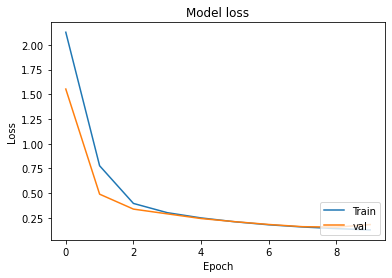

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model loss')
plt.legend(['Train','val'], loc='lower right')
plt.show()

**Save the Model for reuse**

In [0]:
model.save('mnist_model.h5')

**Re-use the saved Model**

In [17]:
from tensorflow.keras.models import load_model
model = load_model('mnist_model.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
C1 (Conv2D)                  (None, 26, 26, 32)        320       
_________________________________________________________________
M2 (MaxPooling2D)            (None, 13, 13, 32)        0         
_________________________________________________________________
C3 (Conv2D)                  (None, 11, 11, 64)        18496     
_________________________________________________________________
M4 (MaxPooling2D)            (None, 5, 5, 64)          0         
_________________________________________________________________
C5 (Conv2D)                  (None, 3, 3, 64)          36928     
_________________________________________________________________
F6 (Flatten)                 (None, 576)               0         
_________________________________________________________________
FC7 (Dense)                  (None, 64)                3

**Predict the class label of the test Images**

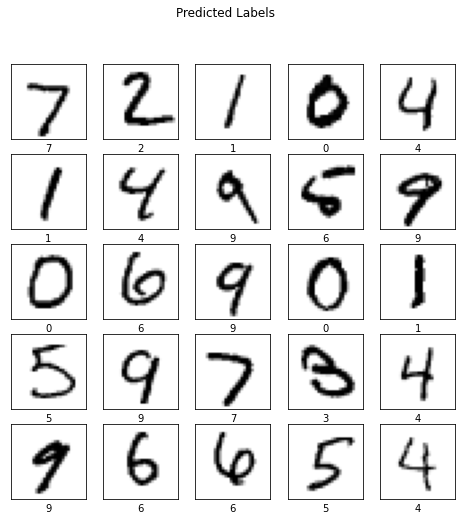

In [18]:
import matplotlib.pyplot as plt
import numpy as np

test_images_ss = test_images[:25]
predicted = model.predict(test_images_ss)

i = 0

plt.figure(figsize=[8, 8])
for	(image,	label) in zip(test_images_ss, predicted):	
	label = np.argmax(label)
	image =	image.reshape((28,28))
	plt.subplot(5, 5, i + 1)
	plt.xticks([])
	plt.yticks([])
	plt.grid(False)
	plt.imshow(image, cmap=plt.cm.binary)
	plt.xlabel(label)
	i += 1
plt.suptitle("Predicted Labels")
plt.show()	

**Visualizing the features learned by ConvNets**

In [19]:
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers[:5]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
activation_model.outputs

[<tf.Tensor 'C1_1/Identity:0' shape=(None, 26, 26, 32) dtype=float32>,
 <tf.Tensor 'M2_1/Identity:0' shape=(None, 13, 13, 32) dtype=float32>,
 <tf.Tensor 'C3_1/Identity:0' shape=(None, 11, 11, 64) dtype=float32>,
 <tf.Tensor 'M4_1/Identity:0' shape=(None, 5, 5, 64) dtype=float32>,
 <tf.Tensor 'C5_1/Identity:0' shape=(None, 3, 3, 64) dtype=float32>]

In [20]:
sample_test_image = np.expand_dims(train_images[10], axis=0)
sample_test_image.shape

(1, 28, 28, 1)

In [21]:
activations = activation_model.predict(sample_test_image)
print(activations)
len(activations)

[array([[[[1.4924145e-02, 0.0000000e+00, 2.8394859e-02, ...,
          1.8635619e-02, 8.2918246e-05, 2.5285922e-02],
         [1.4924145e-02, 0.0000000e+00, 2.8394859e-02, ...,
          1.8635619e-02, 8.2918246e-05, 2.5285922e-02],
         [1.4924145e-02, 0.0000000e+00, 2.8394859e-02, ...,
          1.8635619e-02, 8.2918246e-05, 2.5285922e-02],
         ...,
         [1.4924145e-02, 0.0000000e+00, 2.8394859e-02, ...,
          1.8635619e-02, 8.2918246e-05, 2.5285922e-02],
         [1.4924145e-02, 0.0000000e+00, 2.8394859e-02, ...,
          1.8635619e-02, 8.2918246e-05, 2.5285922e-02],
         [1.4924145e-02, 0.0000000e+00, 2.8394859e-02, ...,
          1.8635619e-02, 8.2918246e-05, 2.5285922e-02]],

        [[1.4924145e-02, 0.0000000e+00, 2.8394859e-02, ...,
          1.8635619e-02, 8.2918246e-05, 2.5285922e-02],
         [1.4924145e-02, 0.0000000e+00, 2.8394859e-02, ...,
          1.8635619e-02, 8.2918246e-05, 2.5285922e-02],
         [1.4924145e-02, 0.0000000e+00, 2.8394859e-02, 

5

In [22]:
layer_names = [layer.name for layer in model.layers[:5]]
layer_names

['C1', 'M2', 'C3', 'M4', 'C5']




C1


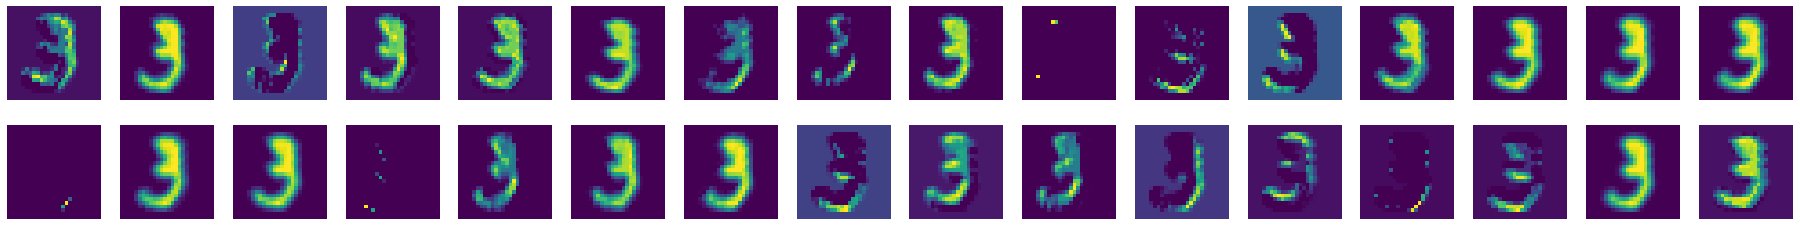




M2


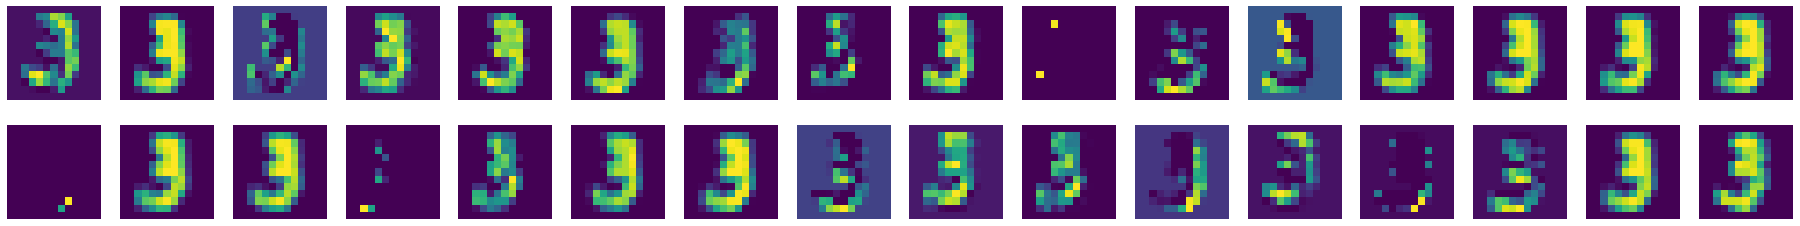




C3


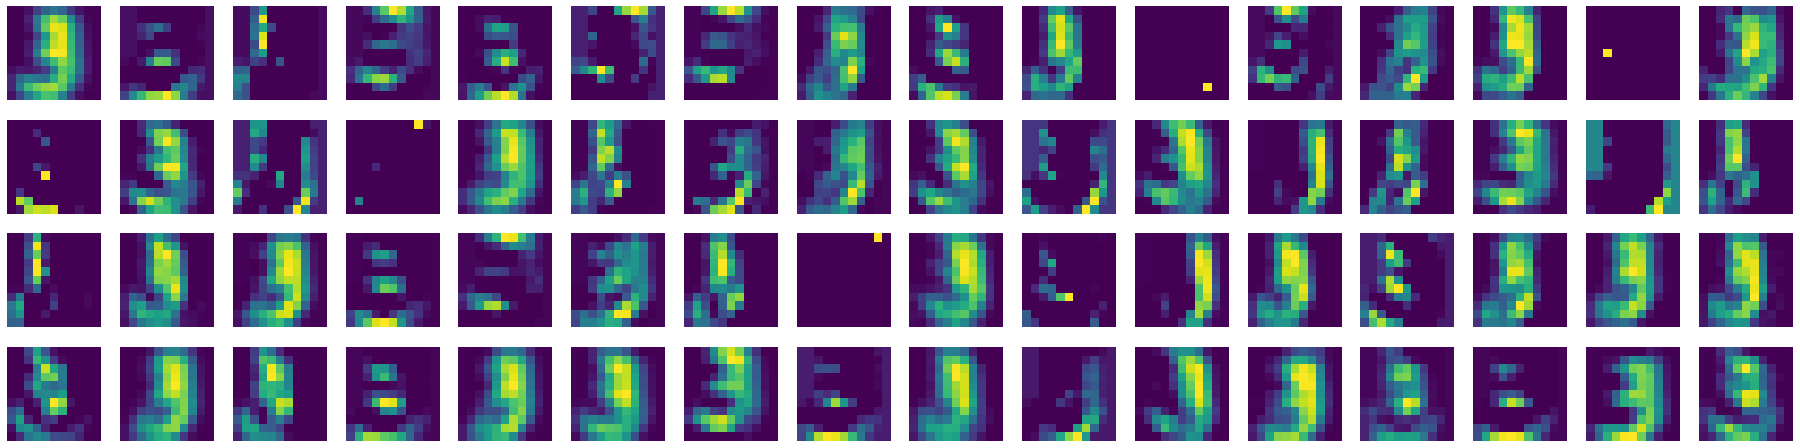




M4


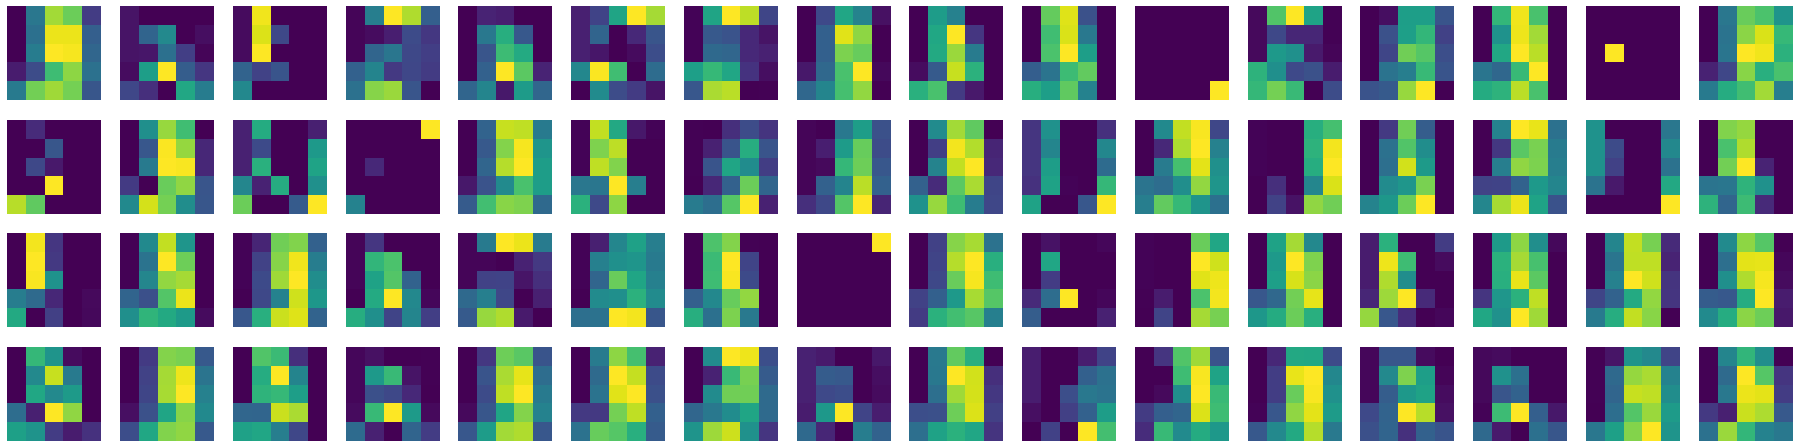




C5


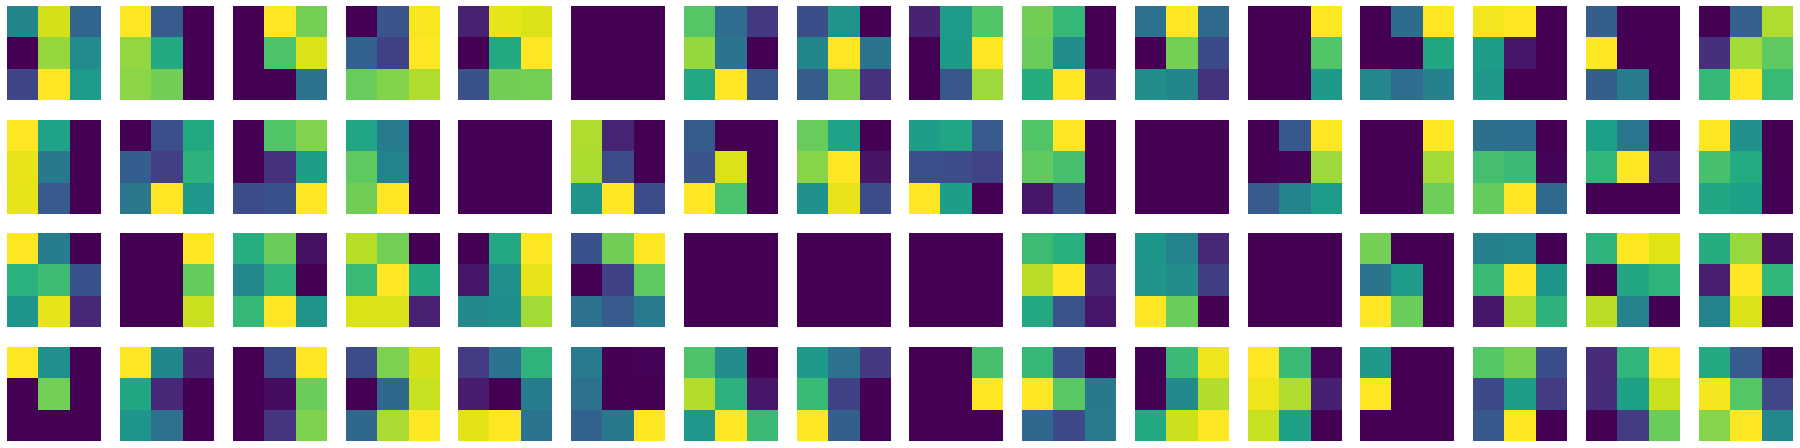

In [23]:
col_size = 16

for layer_name, activation in zip(layer_names, activations):
    max_val = activation.max()
    activation /= max_val

    num_filters = activation.shape[-1]
    row_size = num_filters / col_size

    print("\n" * 2)
    print(layer_name)
    plt.figure(figsize=[col_size * 2, row_size * 2])
    for index in range(num_filters):
        plt.subplot(row_size, col_size, index + 1)
        plt.imshow(activation[0, :, :, index])
        plt.axis("off")
    plt.show()

**Confusion Matrix**

In [24]:
!pip install scikit-plot

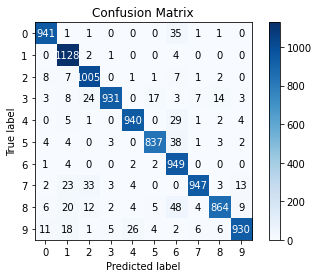

In [25]:
from scikitplot.metrics import plot_confusion_matrix

logits = model.predict(test_images)
predicted = np.argmax(logits, axis=-1)

labels = np.argmax(test_labels, axis=-1)
plot_confusion_matrix(labels, predicted)